In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

## Part 1 

In [2]:
f_list = [pd.read_csv(csv) for csv in sorted(glob('states[0-9].csv'))]

In [3]:
census= pd.concat(f_list)

### 2

In [4]:
census.head()
census= census.drop(['Unnamed: 0'], axis=1)


In [5]:
census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


### 3

In [6]:
census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [7]:
census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

### 4

In [8]:

census['Income'] = census['Income'].str.replace(r'$', '')


### 5

In [9]:
census['Income']= census['Income'].astype(float)

In [10]:
census['Income']

0    43296.358603
1    70354.743902
2    54207.820955
3    41935.633968
4    67264.782303
5    64657.801787
0    64657.801787
1    76146.560588
2    61827.976636
3    75466.363636
4    50690.194987
5    50811.082051
0    50811.082051
1    73264.426282
2    48017.315436
3    59587.048875
4    48616.227848
5    53017.753041
0    53017.753041
1    53885.612648
2    45285.802536
3    44957.993761
4    49181.974359
5    78765.400725
0    78765.400725
1    72838.936726
2    51201.830037
3    62820.833959
4    38909.919207
5    49763.987726
0    49763.987726
1    47645.682836
2    55916.469697
3    55526.525074
4    68728.859589
5    76581.083417
0    76581.083417
1    47329.967871
2    64290.749113
3    49937.464137
4    58188.112195
5    49655.248466
0    49655.248466
1    48100.854267
2    54271.901818
3    56170.464510
4    20720.538286
5    59125.270833
0    59125.270833
1    46296.807763
2    51805.405405
3    47328.083617
4    55874.522601
5    63488.917808
0    63488.917808
1    55602

### 6

In [11]:
census[['Men','Women']] = census['GenderPop'].str.split('[_]', expand=True)
census= census.drop(['GenderPop'], axis=1)
census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M,19334329F


### 7

In [12]:
import re
census['Men']= census['Men'].str.replace('M', '', regex=False)
census['Men']= census['Men'].astype(int)

In [13]:
census['Men'].head()

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Men, dtype: int32

In [14]:
census['Women']= census['Women'].str.replace('F', '', regex=True)

In [15]:
census['Women']=pd.to_numeric(census.Women)


### 9

In [16]:
census['Women'].fillna(census.TotalPop - census.Men, inplace=True)

In [17]:
census['Women']=census['Women'].astype(int)
census['Women'].head(10)

0     2489527
1      349215
2     3342840
3     1506295
4    19334329
5     2630239
0     2630239
1     1841615
2      478041
3      340810
Name: Women, dtype: int32

### 8

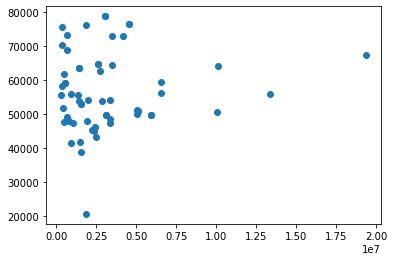

In [18]:
plt.scatter(census['Women'], census['Income'])
plt.show()

### 10

In [19]:
census.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
dtype: bool

### 11

In [20]:
census.drop_duplicates(inplace=True)

### 12

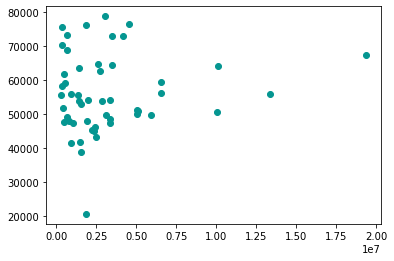

In [21]:
plt.scatter(census['Women'], census['Income'], color = "#059691")
plt.show()

In [22]:
census.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

### 13

In [47]:
census.iloc[:, 2:8].columns

Index(['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], dtype='object')

### 14

In [24]:
census.iloc[:, 2:8] = census.iloc[:, 2:8].replace('%','', regex=True).astype('float64')
census.iloc[:, 2:8].head(10)

,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,NaN
1,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
2,8.824766,64.632710,20.743925,0.259813,3.268692,NaN
3,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609
4,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510


In [25]:
census.iloc[:, 2:8]=census.iloc[:, 2:8].apply(lambda x: x.fillna(x.mean()),axis=0)

In [26]:
census.iloc[:, 2:8].head(10)

,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,0.306500
1,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
2,8.824766,64.632710,20.743925,0.259813,3.268692,0.306500
3,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609
4,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510


### 15

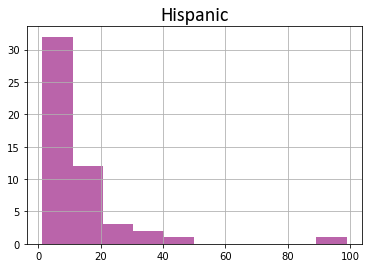

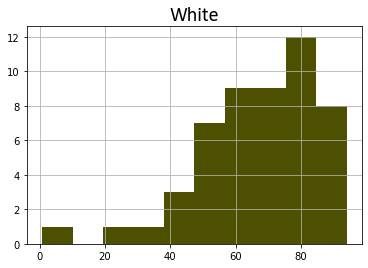

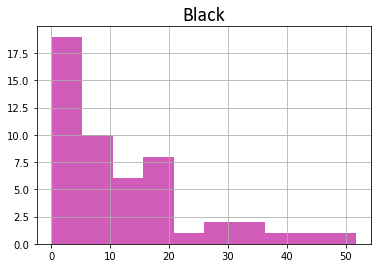

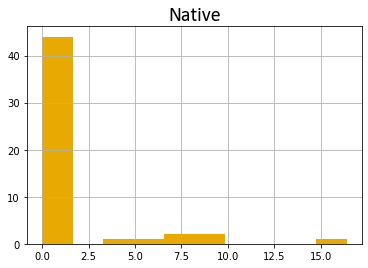

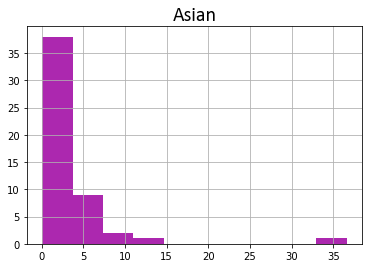

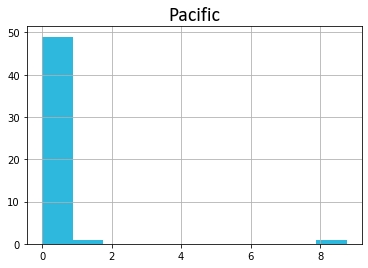

In [53]:
k=census.iloc[:, 2:8]
c= ['Hispanic' ,'White' ,'Black' ,'Native', 'Asian' ,'Pacific']
for i in range(len(census.iloc[:, 2:8].columns)) :
    rgb = np.random.rand(3,)
    plt.hist = k.iloc[:,i].hist(color=rgb)
    plt.title(c[i], fontdict={'fontname': 'Calibri', 'fontsize': 20})
    plt.show()
    


# Part 2

### 1

In [48]:
inventory= pd.read_csv('inventory.csv')

### 2

In [50]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### 3

In [55]:
staten_island = inventory.head(10)

### 4

In [57]:
product_request= staten_island['product_description']

### 5

In [69]:
seed_request=inventory.loc[(inventory['location']== 'Brooklyn') & (inventory['product_type']== 'seeds')]

In [70]:
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


### 6

In [71]:
inventory['in_stock']= np.where(inventory['quantity'] > 0, True, False)

In [73]:
inventory.head(6)

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True


### 7

In [75]:
inventory['total_value']= inventory['price'] * inventory['quantity']

In [77]:
inventory.head(7)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26


### 8

In [82]:
 %run script.py

### 9

In [86]:
inventory['full_description']= inventory.apply(combine_lambda, axis=1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
